In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.model_selection import train_test_split


In [2]:
FILE_NAME= "financialData.csv"

In [3]:
csv_file = pd.read_csv(FILE_NAME)

### Data cleaning

In [25]:
csv_file.isna().sum()

salary       16
years_res    12
debt         17
age          10
dtype: int64

In [36]:
csv_file['salary'] = csv_file['salary'].fillna(csv_file['salary'].mean())
csv_file['age'] = csv_file['age'].fillna(csv_file['age'].mean())
csv_file['debt'] = csv_file['debt'].fillna(csv_file['debt'].mean())
csv_file['years_res'] = csv_file['years_res'].fillna(csv_file['years_res'].mean())

In [38]:
csv_file.isna().sum()

salary       0
years_res    0
debt         0
age          0
dtype: int64

In [40]:
csv_file

,salary,years_res,debt,age
0,25.488,9.1809,22.579,29.0
1,24.814,11.8900,11.614,27.0
2,31.993,18.1420,16.052,36.0
3,39.650,18.2740,13.390,34.0
4,37.737,18.9590,29.221,34.0
...,...,...,...,...
1500,84.651,24.1350,21.237,58.0
1501,76.496,22.8070,24.839,58.0
1502,74.421,29.6630,24.746,60.0
1503,93.776,26.2830,23.479,62.0


# Part I: Visualization

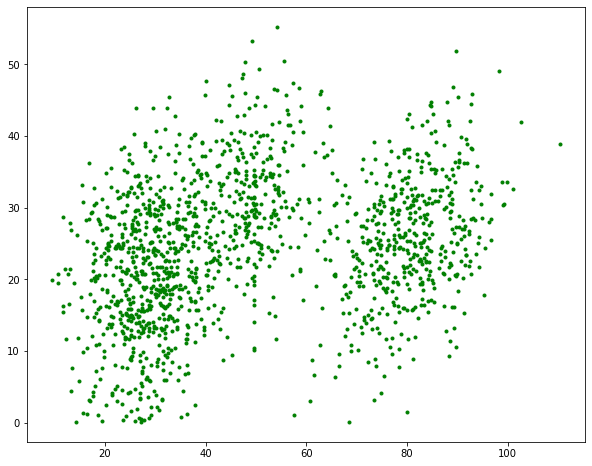

In [41]:
fig = plt.figure(figsize=(10,8))
plt.scatter(csv_file['salary'],csv_file['debt'],c='green',marker='.')

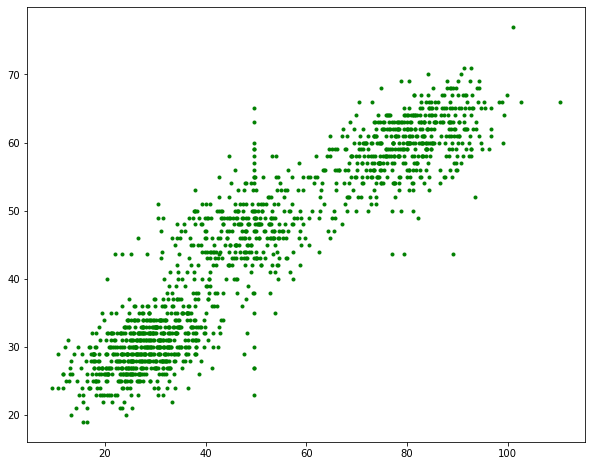

In [42]:
fig = plt.figure(figsize=(10,8))
plt.scatter(csv_file['salary'],csv_file['age'],c='green',marker='.')

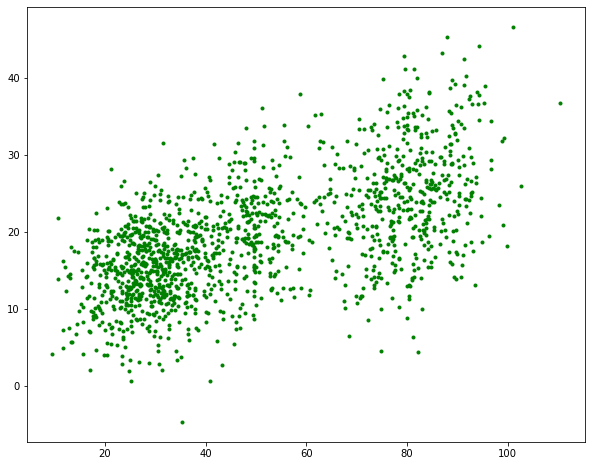

In [43]:
fig = plt.figure(figsize=(10,8))
plt.scatter(csv_file['salary'],csv_file['years_res'],c='green',marker='.')

# Part II: Summary statistics of entire dataset

In [44]:
csv_file.describe()

,salary,years_res,debt,age
count,1505.000000,1505.000000,1505.000000,1505.000000
mean,49.633732,19.321606,24.423671,43.688294
std,23.955359,7.473793,9.784979,13.848169
min,9.506900,-4.646500,0.095728,19.000000
25%,28.928000,14.109000,17.988000,30.000000
50%,43.175000,18.723000,24.627000,44.000000
75%,74.182000,24.060000,30.886000,57.000000
max,110.350000,46.611000,55.259000,77.000000


In [45]:
independentVars= csv_file[['salary','years_res','age']]
target= csv_file[['age']]

# Part III: Clustering and linkage analyses

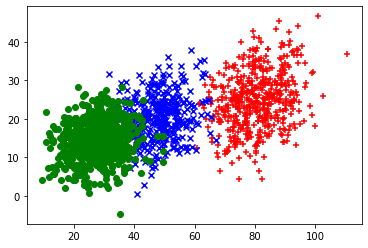

In [52]:
X = csv_file.to_numpy()
kmeans = KMeans(n_clusters=3).fit(X)
group1 = csv_file[kmeans.labels_==1]
group2 = csv_file[kmeans.labels_==0]
group3 = csv_file[kmeans.labels_==2]

plt.scatter(group1['salary'],group1['years_res'], c='red', marker='+')
plt.scatter(group2['salary'],group2['years_res'], c='blue',marker='x')
plt.scatter(group3['salary'],group3['years_res'], c='green',marker='o')


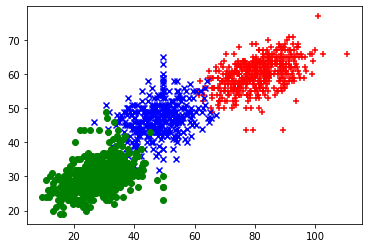

In [53]:
plt.scatter(group1['salary'],group1['age'], c='red', marker='+')
plt.scatter(group2['salary'],group2['age'], c='blue',marker='x')
plt.scatter(group3['salary'],group3['age'], c='green',marker='o')

Text(0, 0.5, 'Davies-Bouldin index')

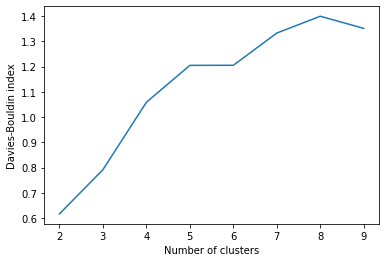

In [71]:
MIN_CLUSTER =2
MAX_CLUSTER =10

pd1 = csv_file[['salary', 'debt']]
XI= pd1.to_numpy()

results = {}

for i in range(MIN_CLUSTER, MAX_CLUSTER):
    kmeans = KMeans(n_clusters=i).fit(X)
    db_index = davies_bouldin_score(X,kmeans.labels_)
    results.update({i:db_index})

plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Bouldin index")

# Optimal grouping = 3

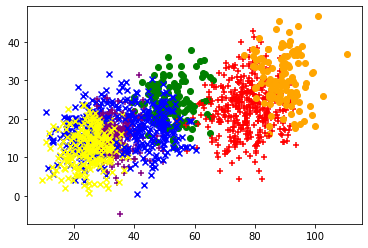

In [76]:
### optimal groupings = 3
kmeans = KMeans(n_clusters=8).fit(X)
group1 = csv_file[kmeans.labels_==1]
group2 = csv_file[kmeans.labels_==0]
group3 = csv_file[kmeans.labels_==2]
group4 = csv_file[kmeans.labels_==3]
group5 = csv_file[kmeans.labels_==4]
group6 = csv_file[kmeans.labels_==5]
group7 = csv_file[kmeans.labels_==6]
group8 = csv_file[kmeans.labels_==7]

plt.scatter(group1['salary'],group1['years_res'], c='red', marker='+')
plt.scatter(group2['salary'],group2['years_res'], c='blue',marker='x')
plt.scatter(group3['salary'],group3['years_res'], c='green',marker='o')
plt.scatter(group4['salary'],group4['years_res'], c='purple', marker='+')
plt.scatter(group5['salary'],group5['years_res'], c='yellow',marker='x')
plt.scatter(group6['salary'],group6['years_res'], c='orange',marker='o')
plt.scatter(group7['salary'],group7['years_res'], c='red', marker='+')
plt.scatter(group8['salary'],group8['years_res'], c='blue',marker='x')


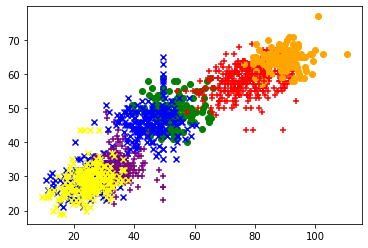

In [77]:
plt.scatter(group1['salary'],group1['age'], c='red', marker='+')
plt.scatter(group2['salary'],group2['age'], c='blue',marker='x')
plt.scatter(group3['salary'],group3['age'], c='green',marker='o')
plt.scatter(group4['salary'],group4['age'], c='purple', marker='+')
plt.scatter(group5['salary'],group5['age'], c='yellow',marker='x')
plt.scatter(group6['salary'],group6['age'], c='orange',marker='o')
plt.scatter(group7['salary'],group7['age'], c='red', marker='+')
plt.scatter(group8['salary'],group8['age'], c='blue',marker='x')

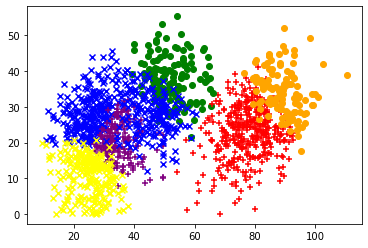

In [78]:
plt.scatter(group1['salary'],group1['debt'], c='red', marker='+')
plt.scatter(group2['salary'],group2['debt'], c='blue',marker='x')
plt.scatter(group3['salary'],group3['debt'], c='green',marker='o')
plt.scatter(group4['salary'],group4['debt'], c='purple', marker='+')
plt.scatter(group5['salary'],group5['debt'], c='yellow',marker='x')
plt.scatter(group6['salary'],group6['debt'], c='orange',marker='o')
plt.scatter(group7['salary'],group7['debt'], c='red', marker='+')
plt.scatter(group8['salary'],group8['debt'], c='blue',marker='x')

# Summary Statistics based off groups

In [79]:
muyears1 = group1['age'].mean()
musalary1 = group1['salary'].mean()

muyears2 = group2['age'].mean()
musalary2 = group2['salary'].mean()

muyears3 = group3['age'].mean()
musalary3 = group3['salary'].mean()

muyears4 = group4['age'].mean()
musalary4 = group4['salary'].mean()

muyears5 = group5['age'].mean()
musalary5 = group5['salary'].mean()

muyears6 = group6['age'].mean()
musalary6 = group6['salary'].mean()

muyears7 = group7['age'].mean()
musalary7 = group7['salary'].mean()

muyears8 = group8['age'].mean()
musalary8 = group8['salary'].mean()

In [80]:
print(f'group1 average age = {muyears1}')
print(f'group1 average salary = {musalary1}\n')

print(f'group2 average age = {muyears2}')
print(f'group2 average salary = {musalary2}\n')

print(f'group3 average age = {muyears3}')
print(f'group3 average salary = {musalary3}\n')

print(f'group4 average age = {muyears4}')
print(f'group4 average salary = {musalary4}\n')

print(f'group5 average age = {muyears5}')
print(f'group5 average salary = {musalary5}\n')

print(f'group6 average age = {muyears6}')
print(f'group6 average salary = {musalary6}\n')

print(f'group7 average age = {muyears7}')
print(f'group7 average salary = {musalary7}\n')

print(f'group8 average age = {muyears8}')
print(f'group8 average salary = {musalary8}\n')

group1 average age = 60.302954535496774
group1 average salary = 80.8559388646289

group2 average age = 29.51219512195122
group2 average salary = 25.256581300813018

group3 average age = 49.03348781653129
group3 average salary = 52.3508890281109

group4 average age = 32.89116241128966
group4 average salary = 35.0103703798588

group5 average age = 28.553044057391883
group5 average salary = 24.943497402597416

group6 average age = 64.3135593220339
group6 average salary = 89.1267118644068

group7 average age = 55.76336754699573
group7 average salary = 72.34505517241381

group8 average age = 46.092608870755924
group8 average salary = 45.520703244385544



# Create group labels

In [81]:
sizeG1 = group1.shape[0]
sizeG2 = group2.shape[0]
sizeG3 = group3.shape[0]
sizeG4 = group4.shape[0]
sizeG5 = group5.shape[0]
sizeG6 = group6.shape[0]
sizeG7 = group7.shape[0]
sizeG8 = group8.shape[0]

sizeG1,sizeG2,sizeG3,sizeG4,sizeG5,sizeG6,sizeG7,sizeG8

(229, 246, 140, 205, 231, 118, 145, 191)

In [84]:
#create ground truths labels for each group

g1Labels = np.zeros(sizeG1, dtype = np.int8)
g2Labels = np.zeros(sizeG2, dtype = np.int8)
g3Labels = np.zeros(sizeG3, dtype = np.int8)
g4Labels = np.zeros(sizeG4, dtype = np.int8)
g5Labels = np.zeros(sizeG5, dtype = np.int8)
g6Labels = np.zeros(sizeG6, dtype = np.int8)
g7Labels = np.zeros(sizeG7, dtype = np.int8)
g8Labels = np.zeros(sizeG8, dtype = np.int8)

g1Labels = g1Labels+1
g2Labels = g2Labels+2
g3Labels = g3Labels+3
g4Labels = g4Labels+4
g5Labels = g5Labels+5
g6Labels = g6Labels+6
g7Labels = g7Labels+7
g8Labels = g8Labels+8


g1Labels,g2Labels,g3Labels,g4Labels,g5Labels,g6Labels,g7Labels,g8Labels

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int8),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [87]:
s1 = pd.Series(g1Labels)
s2 = pd.Series(g2Labels)
s3 = pd.Series(g3Labels)
s4 = pd.Series(g4Labels)
s5 = pd.Series(g5Labels)
s6 = pd.Series(g6Labels)
s7 = pd.Series(g7Labels)
s8 = pd.Series(g8Labels)

s1.shape,s2.shape,s3.shape,s4.shape,s5.shape,s6.shape,s7.shape,s8.shape

((229,), (246,), (140,), (205,), (231,), (118,), (145,), (191,))

In [91]:
###set target label for each group

group1 = group1.assign(target = g1Labels)
group2 = group2.assign(target = g2Labels)
group3 = group3.assign(target = g3Labels)
group4 = group4.assign(target = g4Labels)
group5 = group5.assign(target = g5Labels)
group6 = group6.assign(target = g6Labels)
group7 = group7.assign(target = g7Labels)
group8 = group8.assign(target = g8Labels)

In [95]:
### combine the groups obtained by clustering into a single data set
##

X1 = group1[['salary','age']]
Y1 = group1[['target']]

X2 = group2[['salary','age']]
Y2 = group2[['target']]

X3 = group3[['salary','age']]
Y3 = group3[['target']]

X4 = group4[['salary','age']]
Y4 = group4[['target']]

X5 = group5[['salary','age']]
Y5 = group5[['target']]

X6 = group6[['salary','age']]
Y6 = group6[['target']]

X7 = group7[['salary','age']]
Y7 = group7[['target']]

X8 = group8[['salary','age']]
Y8 = group8[['target']]

allX = pd.concat([X1,X2,X3,X4,X5,X6,X7,X8])
allY = pd.concat([Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8])

X_Train, X_test, y_train, y_test = train_test_split(allX, allY, test_size=0.1, random_state=0)

In [97]:
# decision tree

dtree = tree.DecisionTreeClassifier(criterion = 'entropy')
dtree.fit(X_Train, y_train)

DecisionTreeClassifier(criterion='entropy')

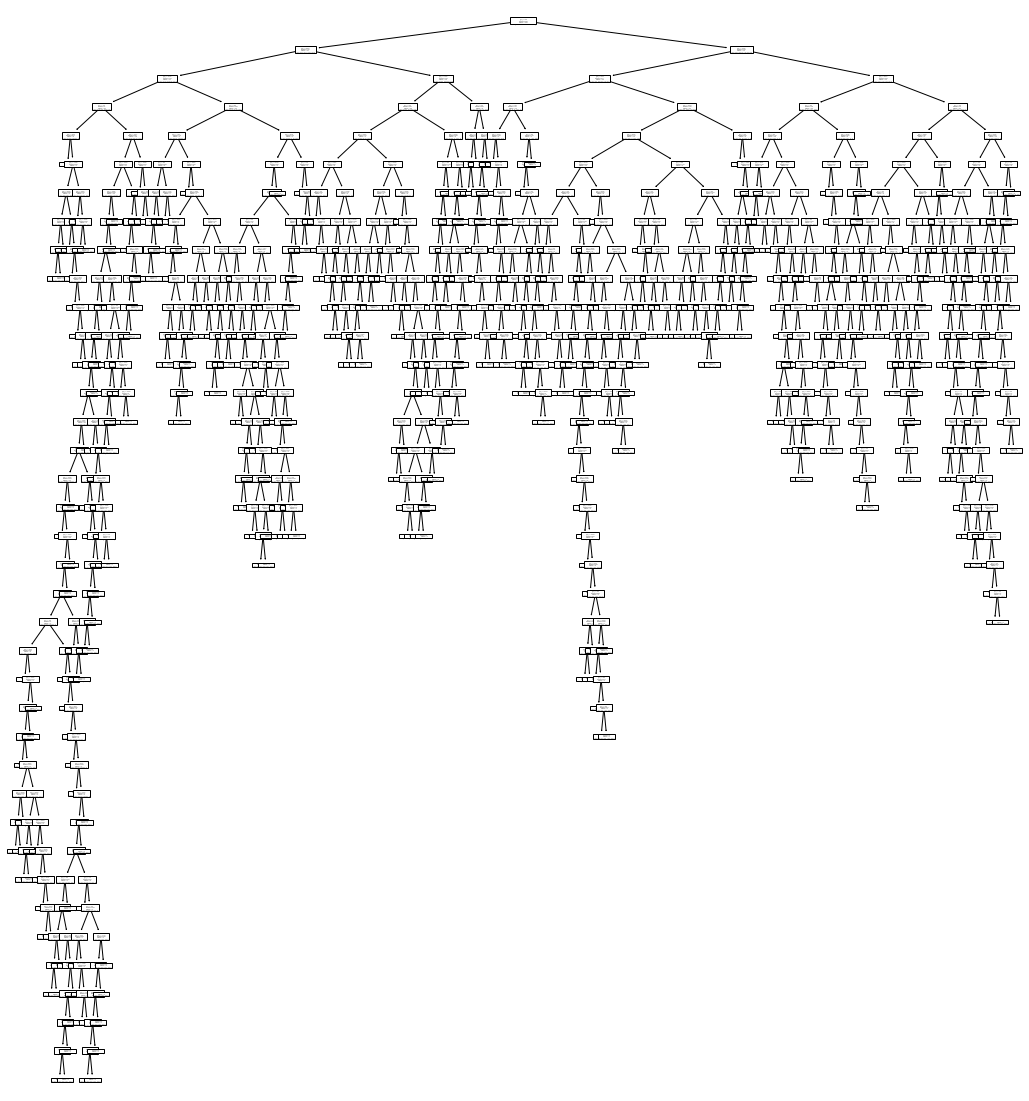

In [109]:
fig = plt.figure(figsize =(18,20))
tree.plot_tree(dtree)
plt.savefig('dtree.pdf')